In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from itertools import combinations

### Socio-data

Load and walkthorugh of the choosen socio-economic data. First the data is loaded for the period 2013-2018, after which historgrams of poverty and total school enrollment are plotted across the boroughs of NYC. 

Index(['Borough', 'Year', 'Total Enrollment', 'Grade PK (Half Day & Full Day)',
       'Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11',
       'Grade 12', '# Female', '% Female', '# Male', '% Male', '# Asian',
       '% Asian', '# Black', '% Black', '# Hispanic', '% Hispanic',
       '# Multiple Race Categories Not Represented',
       '% Multiple Race Categories Not Represented', '# White', '% White',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
(25, 38)
Bronx: 199217.0
Brooklyn: 248505.0
Manhattan: 116288.0
Queens: 212041.0
Staten Island: 36889.0


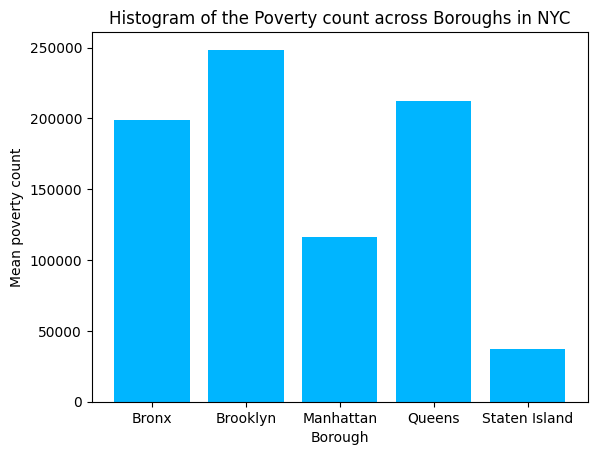

Bronx: 239283.0
Brooklyn: 340293.0
Manhattan: 176406.0
Queens: 306113.0
Staten Island: 65462.0


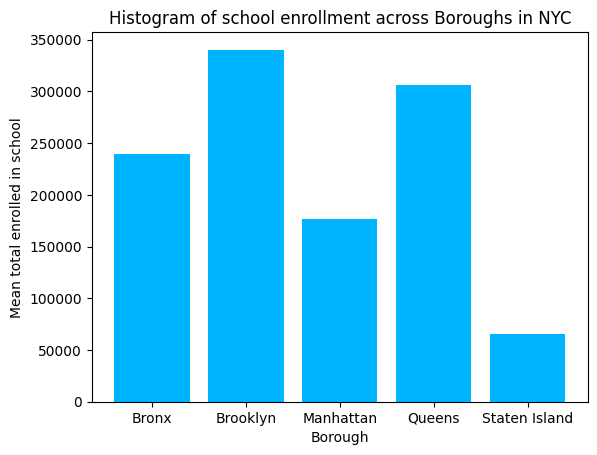

In [5]:
# load data of interest from csv file
# path
#fpath = "/Users/benjaminfazal/SocialData2024/Ass_final"

data_soc = pd.read_csv("./socio_b.csv")
print(data_soc.columns)
print(data_soc["Borough"].unique())

# get mean values for poverty across boroughs
print(np.shape(data_soc))
mean_soc = {bor: np.round(data_soc[data_soc['Borough'] == bor].iloc[:,-3].mean()) for bor in data_soc["Borough"].unique()}

# set the sns palette to hsv, 8
color = sns.color_palette("hsv",8)[4]

# print the mean values for each borough
for borough, values in mean_soc.items():
    print(f"{borough}: {values}")

# make histogram for the mean values
plt.bar(list(mean_soc.keys()), list(mean_soc.values()), color=color)
plt.xlabel('Borough')
plt.ylabel('Mean poverty count')
plt.title('Histogram of the Poverty count across Boroughs in NYC')
plt.show()

mean_soc = {bor: np.round(data_soc[data_soc['Borough'] == bor].iloc[:,2].mean()) for bor in data_soc["Borough"].unique()}

# print the mean values for each borough
for borough, values in mean_soc.items():
    print(f"{borough}: {values}")

# make histogram for the mean values
plt.bar(list(mean_soc.keys()), list(mean_soc.values()), color=color)
plt.xlabel('Borough')
plt.ylabel('Mean total enrolled in school')
plt.title('Histogram of school enrollment across Boroughs in NYC')
plt.show()

A linear model between the two highlighted variables are then fitted and plotted to showcase and explore plausible data relationships. Moreover, the correlation coefficient is also calculated to furhter understand the relationship. 

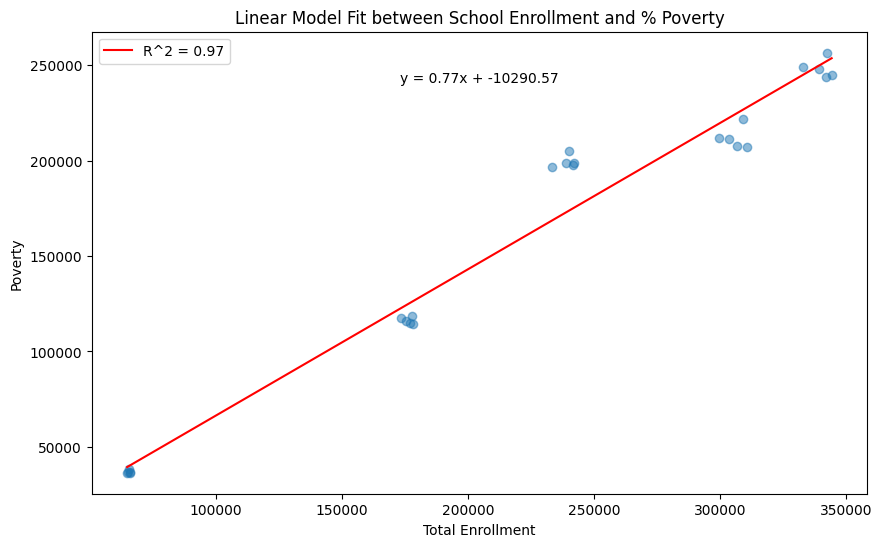

Slope: 0.7666061479848921
Intercept: -10290.569666155718
R-squared: 0.9656678896188308
Correlation coefficient: 0.9826840232846115


In [6]:
# fit linear model between poverty and school particapation
school = data_soc['Total Enrollment']
pov = data_soc['# Poverty']

slope, intercept = np.polyfit(school, pov, 1)

# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(school, pov, alpha=0.5)

# Add labels and title
plt.xlabel('Total Enrollment')
plt.ylabel('Poverty')
plt.title('Linear Model Fit between School Enrollment and % Poverty')

# Calculate the R-squared value for the linear fit
correlation_matrix = np.corrcoef(school, pov)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Plot the regression line
x = np.linspace(min(school), max(school), 100)
plt.plot(x, slope*x + intercept, color='red', label=f'R^2 = {r_squared:.2f}')

# Add legend with R^2 value for linear fit and the equation of the line
plt.legend()

# Add text with the equation of the line
plt.text(0.5, 0.9, f'y = {slope:.2f}x + {intercept:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared}')
print(f'Correlation coefficient: {correlation_xy}')



### Interactive plots (bokeh)

Interactive bokeh-plots are then generated for 3 different featuretypes (total enrollment, poverty and english learners) both normalized and non-normalized. 

In [7]:
from bokeh.models import ColumnDataSource, Legend
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, dodge
from bokeh.palettes import Viridis3

# calculate the mean values for the features of interest across boroughs
mean_enrollment = data_soc.groupby('Borough')['Total Enrollment'].mean().reset_index(name='mean_enrollment')
mean_poverty = data_soc.groupby('Borough')['# Poverty'].mean().reset_index(name='mean_poverty')
mean_english_learners = data_soc.groupby('Borough')['# English Language Learners'].mean().reset_index(name='mean_english_learners')

# merge the data into a single dataframe
mean_data = mean_enrollment
mean_data = mean_data.merge(mean_poverty, on='Borough')
mean_data = mean_data.merge(mean_english_learners, on='Borough')

# convert to datasource
source = ColumnDataSource(mean_data)

# figure
p = figure(x_range=mean_data['Borough'], title="Mean Values of Socio-Economic Features Across Boroughs",
           toolbar_location=None, tools="", y_axis_label="Mean Value")

# define feature names and colors
features = ['mean_enrollment', 'mean_poverty', 'mean_english_learners']
colors = Viridis3

# add bars for each feature
for idx, feature in enumerate(features):
    p.vbar(x=dodge('Borough', -0.25+0.25*idx, range=p.x_range), top=feature, width=0.2, source=source,
           color=colors[idx], legend_label=feature)

# add (config) legend
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.click_policy = "mute"

# Show the plot
show(p)

In [8]:
from bokeh.models import ColumnDataSource, Legend
from bokeh.plotting import figure, show
from bokeh.transform import dodge
from bokeh.palettes import Viridis3

# calculate the mean values for the features of interest across boroughs
mean_enrollment = data_soc.groupby('Borough')['Total Enrollment'].mean().reset_index(name='mean_enrollment')
mean_poverty = data_soc.groupby('Borough')['# Poverty'].mean().reset_index(name='mean_poverty')
mean_english_learners = data_soc.groupby('Borough')['# English Language Learners'].mean().reset_index(name='mean_english_learners')

# normalize the means by dividing by the sum of the means
total_mean_enrollment = mean_enrollment['mean_enrollment'].sum()
mean_enrollment['mean_enrollment'] /= total_mean_enrollment

total_mean_poverty = mean_poverty['mean_poverty'].sum()
mean_poverty['mean_poverty'] /= total_mean_poverty

total_mean_english_learners = mean_english_learners['mean_english_learners'].sum()
mean_english_learners['mean_english_learners'] /= total_mean_english_learners

# merge the data into a single DataFrame
mean_data = mean_enrollment
mean_data = mean_data.merge(mean_poverty, on='Borough')
mean_data = mean_data.merge(mean_english_learners, on='Borough')

# convert to data source
source = ColumnDataSource(mean_data)

# create a figure
p = figure(x_range=mean_data['Borough'], title="Normalized Mean Values of Socio-Economic Features Across Boroughs",
           toolbar_location=None, tools="", y_axis_label="Normalized Mean Value")

# define feature names and colors
features = ['mean_enrollment', 'mean_poverty', 'mean_english_learners']
colors = Viridis3

# add bars for each feature
for idx, feature in enumerate(features):
    p.vbar(x=dodge('Borough', -0.25+0.25*idx, range=p.x_range), top=feature, width=0.2, source=source,
           color=colors[idx], legend_label=feature)

# configure legend
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.click_policy = "mute"

# plot
show(p)

### Probability 

Lastly, the conditional probability of observing poverty given a borough is calculated to truly understand the occurence of the feature in the borough of interest. This is done to make comparative measures across the areas of interest. 

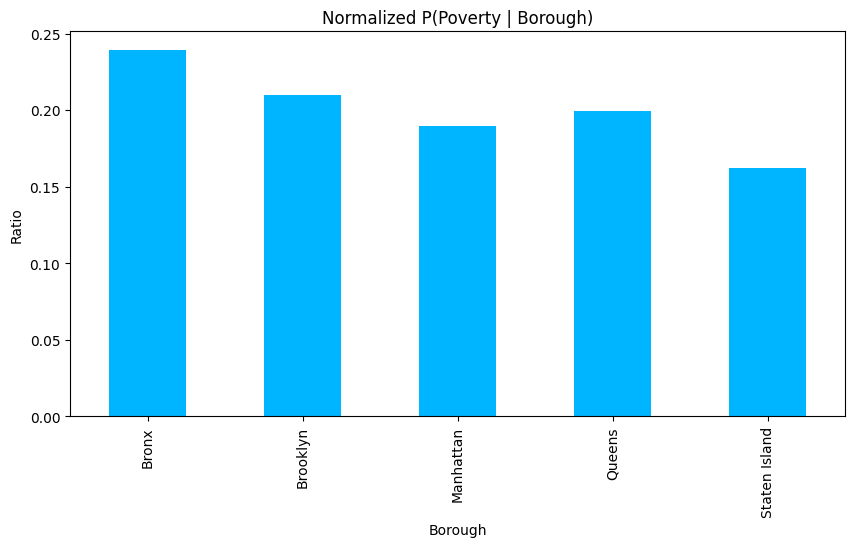

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate the total poverty cases for normalization
total_poverty = data_soc['# Poverty'].sum()

# calculate the sum of poverty cases for each borough
borough_poverty = data_soc.groupby('Borough')['# Poverty'].sum()

# count the number of people in each borough
borough_population = data_soc.groupby('Borough')['# Female'].sum() + data_soc.groupby('Borough')['# Male'].sum()

# calculate the ratio of poverty cases for each borough
ratios = borough_poverty / borough_population

# normalize the ratios by dividing by the sum of the ratios
ratios /= ratios.sum()

# plot
plt.figure(figsize=(10, 5))  # Adjust the size as needed
ratios.plot(kind='bar', color=color)
plt.ylabel('Ratio')
plt.title('Normalized P(Poverty | Borough)')
plt.show()

In [10]:
import pandas as pd
import seaborn as sns

# Load the data
#file_path = "C:\\Users\\jbh\\Desktop\\SocialData_FinalProject\\nyc_decennialcensusdata_2010_2020_change-core-geographies.xlsx"
file_path = "./nyc_decennialcensusdata_2010_2020_change-core-geographies.xlsx"
data_2020 = pd.read_excel(file_path, sheet_name='2020', nrows=6)

# Set the index and drop unnecessary rows
data_2020.set_index('Borough', inplace=True)
data_2020 = data_2020.drop('New York City', axis=0)

# Define columns to keep
columns_to_keep = ['Pop1', 'Male P', 'MdAge', 'PopU18P', 'Pop65plP', 'PopAcre', 'Hsp1P', 'WNHP', 'BNHP', 'ANHP', 'ONHP', 'TwoPlNHP', 'HmOwnVcRt', 'RntVcRt', 'AvgHHSz']
data_2020 = data_2020[columns_to_keep]

# Get color palette
colors = sns.color_palette('viridis', n_colors=5)

# Initialize result dictionary
result_dict = {}

# Iterate through each column
for column in data_2020.columns:
    # Get the colors for the column
    column_colors = colors[:len(data_2020)]
    column_colors_hex = [f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}' for color in column_colors]
    
    # Create a list of dictionaries for the column
    column_data = []
    for index, (borough, value) in enumerate(data_2020[column].items()):
        borough_data = {
            'borough': borough,
            'value': value,
            'color': column_colors_hex[index]
        }
        column_data.append(borough_data)
    
    # Add column data to result dictionary
    result_dict[column] = column_data

# Print the result dictionary
print(result_dict)


{'Pop1': [{'borough': 'Manhattan', 'value': 1694251, 'color': '#443982'}, {'borough': 'Bronx', 'value': 1472654, 'color': '#30678d'}, {'borough': 'Brooklyn', 'value': 2736074, 'color': '#20908c'}, {'borough': 'Queens', 'value': 2405464, 'color': '#35b778'}, {'borough': 'Staten Island', 'value': 495747, 'color': '#90d643'}], 'Male P': [{'borough': 'Manhattan', 'value': 46.9, 'color': '#443982'}, {'borough': 'Bronx', 'value': 46.8, 'color': '#30678d'}, {'borough': 'Brooklyn', 'value': 47.4, 'color': '#20908c'}, {'borough': 'Queens', 'value': 48.4, 'color': '#35b778'}, {'borough': 'Staten Island', 'value': 48.5, 'color': '#90d643'}], 'MdAge': [{'borough': 'Manhattan', 'value': 36.9, 'color': '#443982'}, {'borough': 'Bronx', 'value': 35.6, 'color': '#30678d'}, {'borough': 'Brooklyn', 'value': 35.2, 'color': '#20908c'}, {'borough': 'Queens', 'value': 39.1, 'color': '#35b778'}, {'borough': 'Staten Island', 'value': 40.4, 'color': '#90d643'}], 'PopU18P': [{'borough': 'Manhattan', 'value': 13.

In [11]:
import folium
from folium import Choropleth, LayerControl

# Latitude and longitude coordinates for centering the map
nyc_coordinates = (40.7128, -74.0060)

# Create a base map
map = folium.Map(location=nyc_coordinates, zoom_start=10)

# Borough boundaries GeoJSON (You need a GeoJSON file for NYC boroughs)
geo_path = 'new-york-city-boroughs.geojson'  # Path to your GeoJSON file

# Function to create choropleth maps for different metrics
def add_choropleth(map, geo_path, data, column, name):
    Choropleth(
        geo_data=geo_path,
        name=name,
        data=data.reset_index(),  # Reset index to make 'Borough' a column
        columns=['Borough', column],
        key_on='feature.properties.name',  # Ensure this matches the property in your GeoJSON
        fill_color='YlOrRd',  # Color scheme
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=name,
        # deselect all layers by default
        show=False
    ).add_to(map)


# Add choropleth layers for each column of interest
for column in columns_to_keep:
    add_choropleth(map, geo_path, data_2020, column, column)

# Add layer control to toggle layers
LayerControl(position="topright", collapsed=True).add_to(map)

# # save the map
# map.save('nyc_choropleth.html')
# map




### Add images to multipanel 

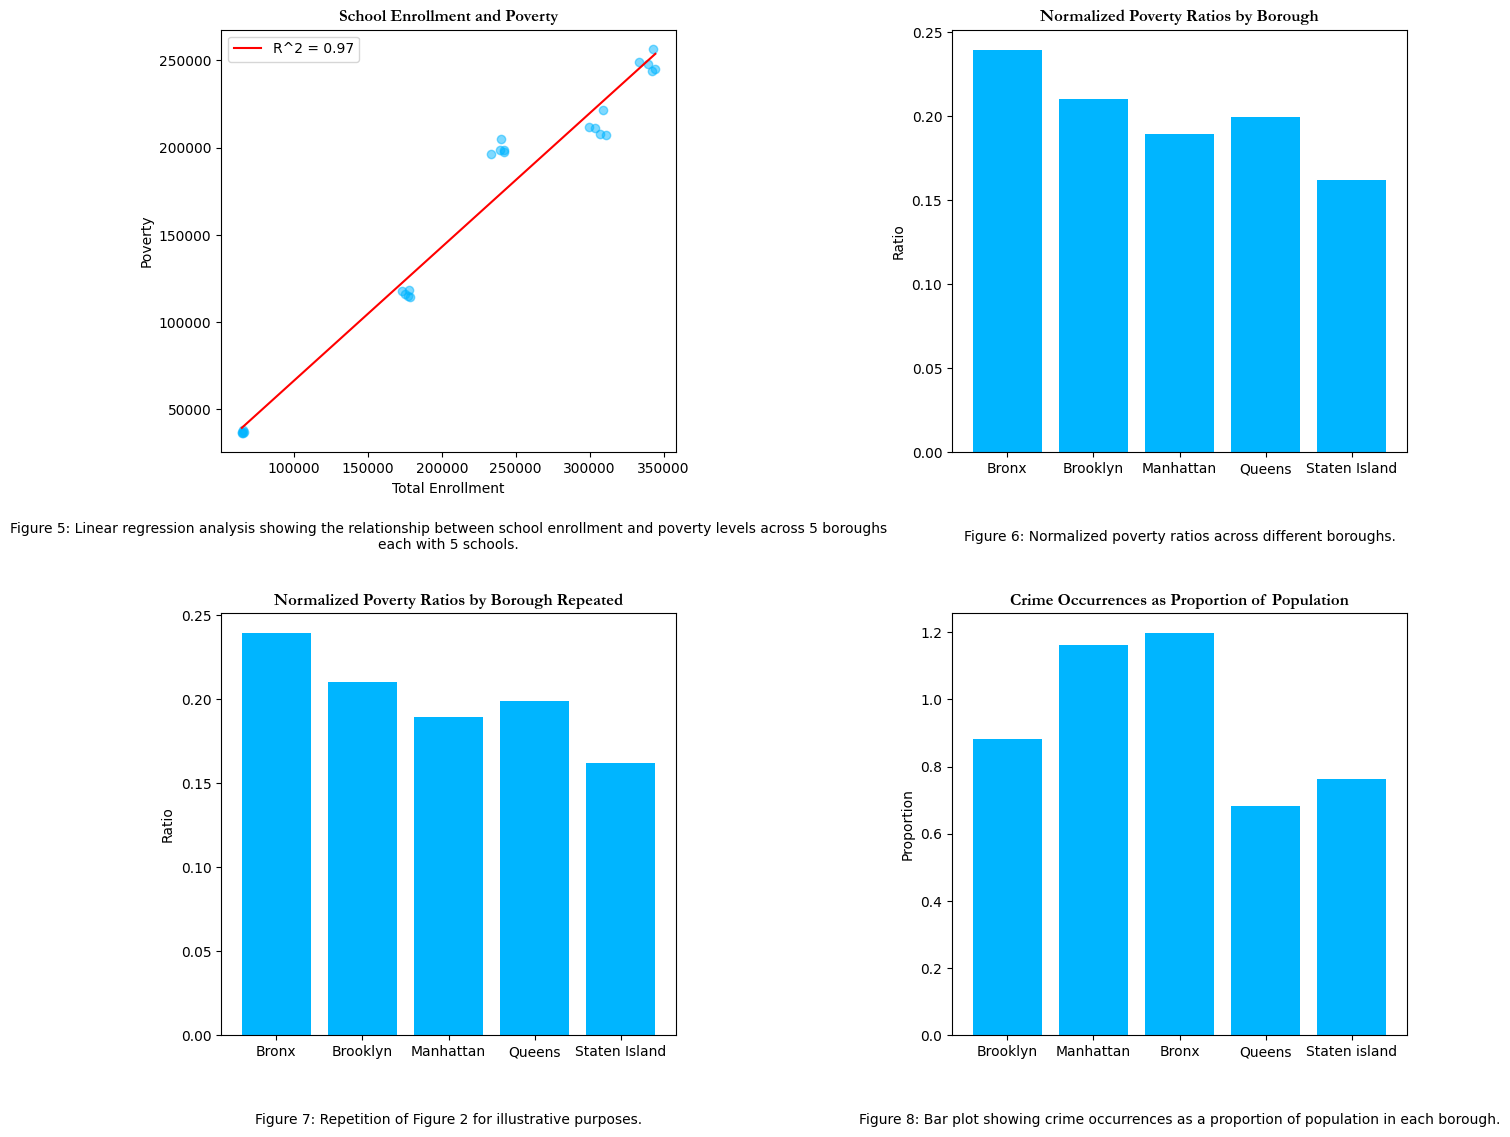

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the first dataset
#fpath1 = "/Users/benjaminfazal/SocialData2024/Ass_final"
data_soc = pd.read_csv("./socio_b.csv")

# First subplot: fit linear model between poverty and school participation
school = data_soc['Total Enrollment']
pov = data_soc['# Poverty']
slope, intercept = np.polyfit(school, pov, 1)

# Calculate the R-squared value for the linear fit
correlation_matrix = np.corrcoef(school, pov)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Second and Third subplot data: normalized P(Poverty | Borough)
borough_poverty = data_soc.groupby('Borough')['# Poverty'].sum()
borough_population = data_soc.groupby('Borough')['# Female'].sum() + data_soc.groupby('Borough')['# Male'].sum()
ratios = borough_poverty / borough_population
ratios /= ratios.sum()

# Load the second dataset
#path2 = '/Users/benjaminfazal/Desktop/Skole/Kandidat/Semester_1/Social_data/'
data_crime = pd.read_csv('./NYPD_Complaint_Data_Cleaned.csv')

# Fourth subplot: crime occurrences as a proportion
borough_crimes = data_crime['Borough_Name'].value_counts()
borough_crimes = borough_crimes.reset_index()
borough_crimes.columns = ['Borough_name', 'Count']
population = [2736074, 1694251, 1472654, 2405464, 495747]
borough_crimes['Population'] = population
borough_crimes['Proportion'] = borough_crimes['Count'] / borough_crimes['Population']

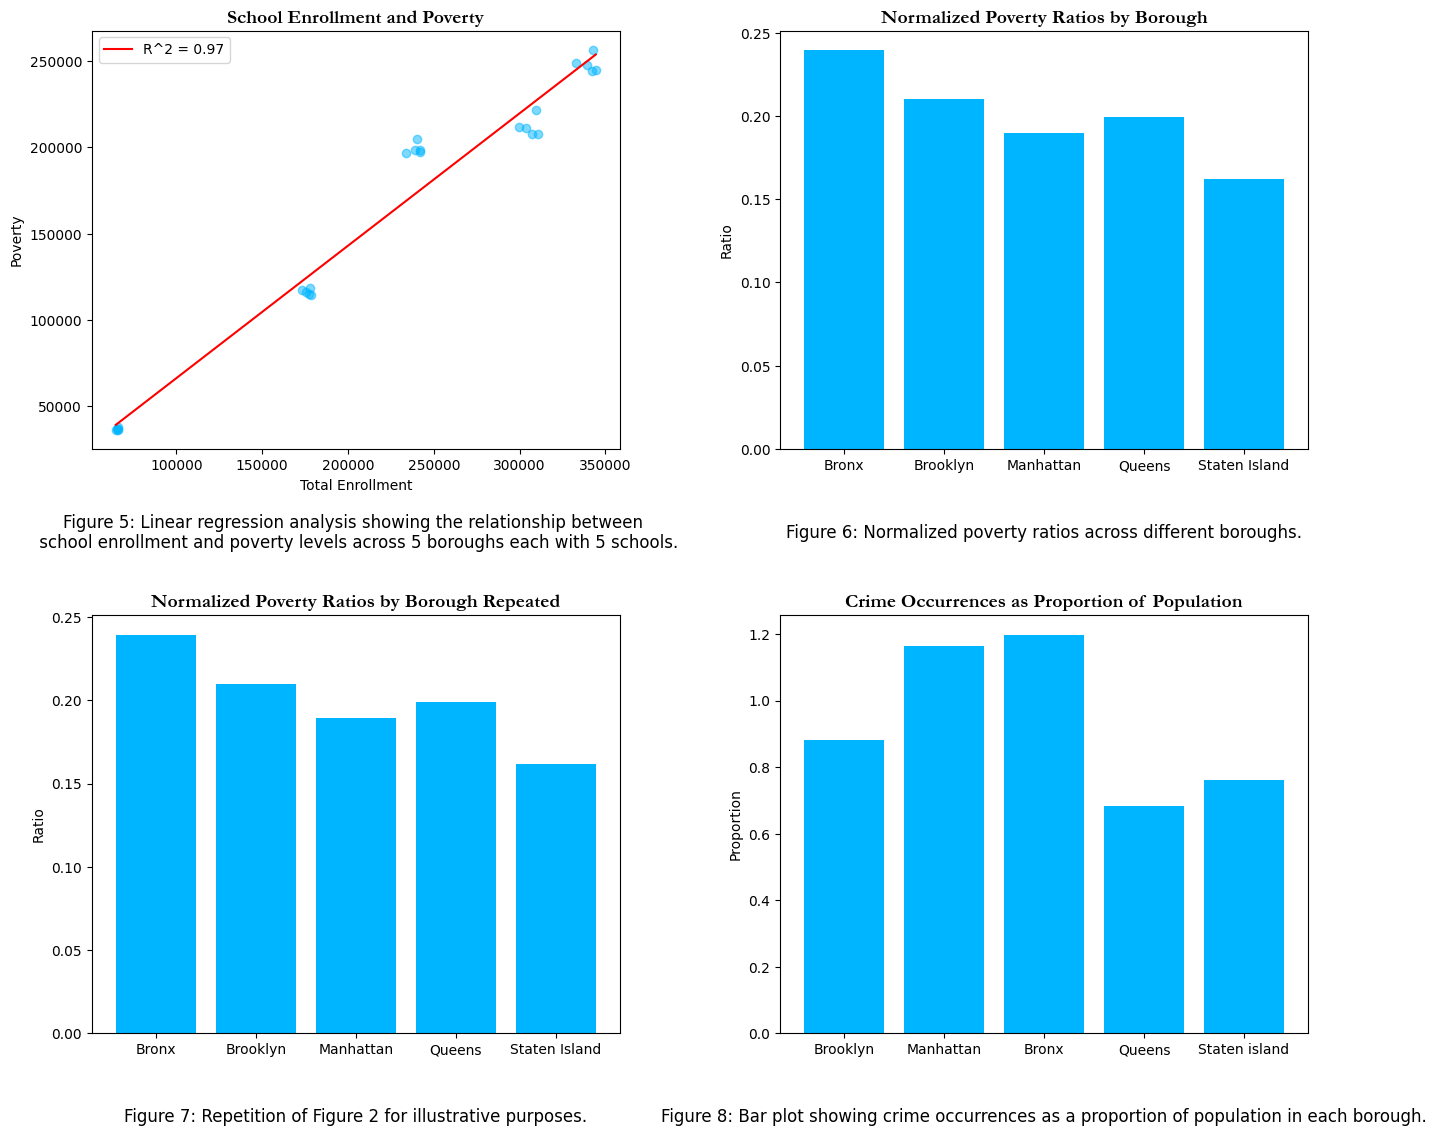

In [28]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
color = sns.color_palette("hsv",8)[4]
# Scatter plot with linear regression
axs[0, 0].scatter(school, pov, alpha=0.5, color=color)
axs[0, 0].plot(np.linspace(min(school), max(school), 100), slope*np.linspace(min(school), max(school), 100) + intercept, color='red', label=f'R^2 = {r_squared:.2f}')
axs[0, 0].set_xlabel('Total Enrollment')
axs[0, 0].set_ylabel('Poverty')
axs[0, 0].set_title('School Enrollment and Poverty', fontsize=14, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[0, 0].legend()
axs[0, 0].text(0.5, -0.2, 'Figure 5: Linear regression analysis showing the relationship between \n school enrollment and poverty levels across 5 boroughs each with 5 schools.', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transAxes, fontsize=12, wrap=True)
# Bar plot for normalized P(Poverty | Borough)
axs[0, 1].bar(ratios.index, ratios, color=color)
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].set_title('Normalized Poverty Ratios by Borough', fontsize=14, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[0, 1].text(0.5, -0.2, 'Figure 6: Normalized poverty ratios across different boroughs.', horizontalalignment='center', verticalalignment='center', transform=axs[0, 1].transAxes, fontsize=12)

# Repeat the normalized plot for the same data (demonstrative, could change to different data or analysis)
axs[1, 0].bar(ratios.index, ratios, color=color)
axs[1, 0].set_ylabel('Ratio')
axs[1, 0].set_title('Normalized Poverty Ratios by Borough Repeated', fontsize=14, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[1, 0].text(0.5, -0.2, 'Figure 7: Repetition of Figure 2 for illustrative purposes.', horizontalalignment='center', verticalalignment='center', transform=axs[1, 0].transAxes, fontsize=12)

# Bar plot for crime occurrences as a proportion
axs[1, 1].bar(borough_crimes['Borough_name'], borough_crimes['Proportion'], color=color)
axs[1, 1].set_ylabel('Proportion')
axs[1, 1].set_title('Crime Occurrences as Proportion of Population', fontsize=14, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
# change xlabels from "BROOKLYN" to "Brooklyn" etc
axs[1, 1].set_xticklabels([borough.capitalize() for borough in borough_crimes['Borough_name']])
axs[1, 1].text(0.5, -0.2, 'Figure 8: Bar plot showing crime occurrences as a proportion of population in each borough.', horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes, fontsize=12)

plt.tight_layout(pad=3.0)
plt.savefig('multiple_plots.png')
plt.show()


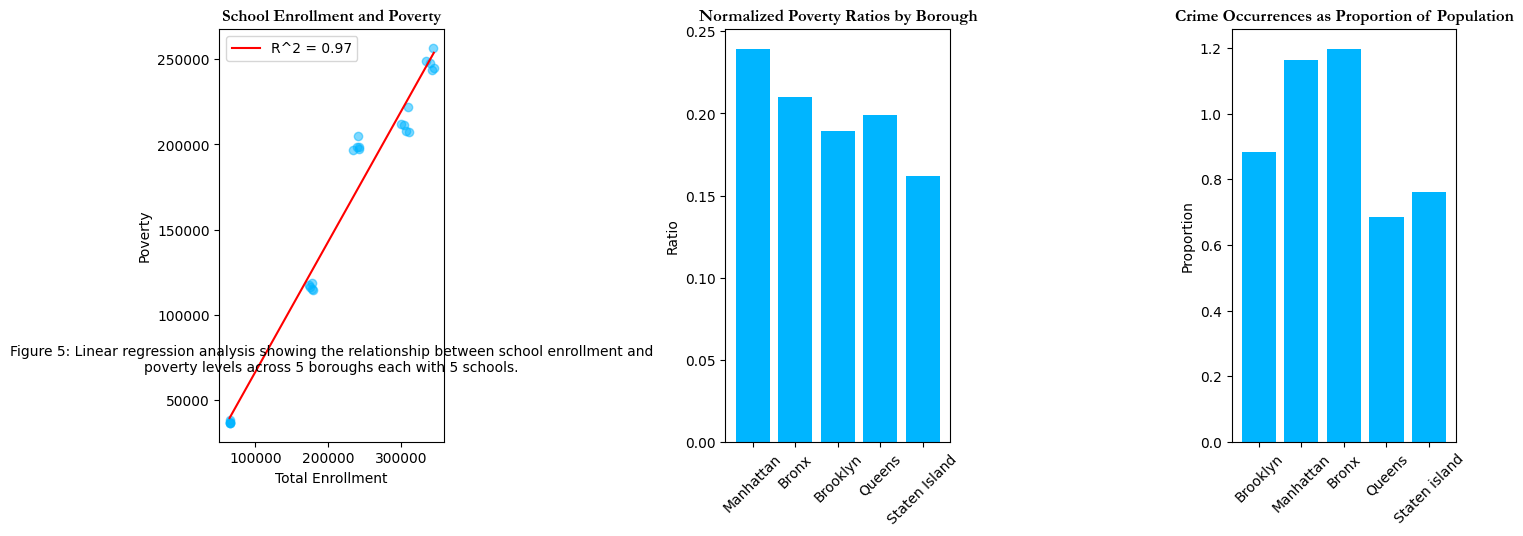

In [24]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Scatter plot with linear regression
color = sns.color_palette("hsv", 8)[4]
axs[0].scatter(school, pov, alpha=0.5, color=color)
axs[0].plot(np.linspace(min(school), max(school), 100), slope * np.linspace(min(school), max(school), 100) + intercept, color='red', label=f'R^2 = {r_squared:.2f}')
axs[0].set_xlabel('Total Enrollment')
axs[0].set_ylabel('Poverty')
axs[0].set_title('School Enrollment and Poverty', fontsize=12, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[0].text(0.5, 0.2,'Figure 5: Linear regression analysis showing the relationship between school enrollment and poverty levels across 5 boroughs each with 5 schools.', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, fontsize=10, wrap=True)
axs[0].legend()

# Bar plot for normalized P(Poverty | Borough)
axs[1].bar(range(len(ratios)), ratios, color=color)
axs[1].set_xticks(range(len(ratios)))
axs[1].set_xticklabels(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'], rotation=45)
axs[1].set_ylabel('Ratio')
axs[1].set_title('Normalized Poverty Ratios by Borough', fontsize=12, fontdict={'fontname': 'Garamond', 'weight': 'bold'})

# Bar plot for crime occurrences as a proportion
axs[2].bar(range(len(borough_crimes['Proportion'])), borough_crimes['Proportion'], color=color)
axs[2].set_xticks(range(len(borough_crimes['Proportion'])))
axs[2].set_xticklabels([b.capitalize() for b in borough_crimes['Borough_name']], rotation=45)
axs[2].set_ylabel('Proportion')
axs[2].set_title('Crime Occurrences as Proportion of Population', fontsize=12, fontdict={'fontname': 'Garamond', 'weight': 'bold'})

plt.tight_layout(pad=3.0)
plt.savefig('multiple_plots.png')
plt.show()